In [1]:
# imports
import pandas as pd
from vega_datasets import data


In [2]:
df = data.sf_temps()


1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [3]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

<AxesSubplot:xlabel='date'>

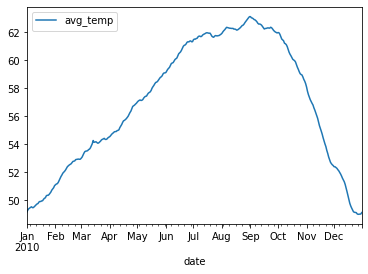

In [4]:
# 1. Resample by the day and take the average temperature. Visualize the average temperature over time.
df_day = df.set_index('date').resample('D').mean()
# rename temp column to avg_temp
df_day.rename(columns={'temp': 'avg_temp'}, inplace=True)
# Visualize the average temperature over time.
df_day.plot()


<AxesSubplot:xlabel='date'>

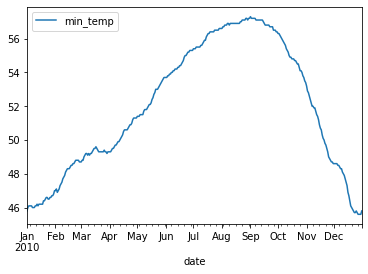

In [5]:
# 2. Write the code necessary to visualize the minimum temperature over time.
df_min = df.set_index('date').resample('D').min()
# rename temp column to min_temp
df_min.rename(columns={'temp': 'min_temp'}, inplace=True)
# Visualize the minimum temperature over time.
df_min.plot()

<AxesSubplot:xlabel='date'>

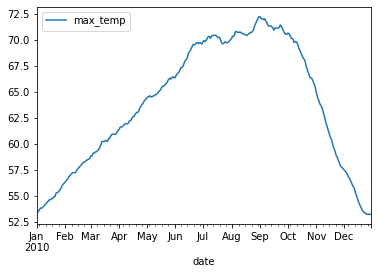

In [6]:
# 3. Write the code necessary to visualize the maximum temperature over time.
df_max = df.set_index('date').resample('D').max()
# rename temp column to max_temp
df_max.rename(columns={'temp': 'max_temp'}, inplace=True)
# Visualize the maximum temperature over time.
df_max.plot()


In [7]:
# combine the dataframes
vegas_temps = pd.concat([df_day, df_min, df_max], axis=1)
vegas_temps.head()

,avg_temp,min_temp,max_temp
date,,,
2010-01-01,49.170833,45.8,53.3
2010-01-02,49.304167,46.0,53.4
2010-01-03,49.391667,46.1,53.5
2010-01-04,49.445833,46.1,53.6
2010-01-05,49.491667,46.1,53.8


In [8]:
# 4. Which month is the coldest, on average?
avg_M = vegas_temps.resample('M').mean()

# find the month with the lowest average temperature
print('The month with the lowest average tempature is', avg_M.idxmin().avg_temp.month_name())
print('The lowest average tempature is', avg_M.min().avg_temp)

The month with the lowest average tempature is January
The lowest average tempature is 49.98413978494624


In [10]:
# 5. Which month has the highest average temperature?
print('The month with the highest average tempature is', avg_M.idxmax().avg_temp.month_name())
print('The highest average tempature is', avg_M.max().avg_temp)

The month with the highest average tempature is September
The highest average tempature is 62.48708333333333


In [11]:
# 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max']))
df_day_min_max = df.set_index('date').resample('D').agg(['min', 'max'])
# calculate the change in temperature for the day using agg min and max
df_day_min_max.columns = ['min', 'max']
df_day_min_max['delta_temp'] = df_day_min_max['max'] - df_day_min_max['min']
# Which month has the highest daily delta_temp?
print('The month that has the highest daily delta temp is', df_day_min_max.delta_temp.idxmax().month_name())
print('The highest delta temp is', df_day_min_max.delta_temp.max())

The month that has the highest daily delta temp is August
The highest delta temp is 15.0


<AxesSubplot:xlabel='date'>

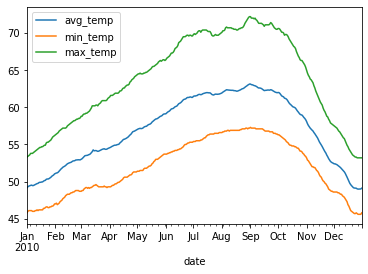

In [12]:
# 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.
vegas_temps.plot()


Use the dataset to answer the following questions: data.seattle_weather()

- Which year and month combination has the highest amount of precipitation?

- Visualize the amount of monthly precipitation over time.

- Visualize the amount of wind over time. Choose a time interval you think is appropriate.

- Which year-month combination is the windiest?

- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

- In which month does it rain the most?

- Which month has the most number of days with a non-zero amount of precipitation?


In [13]:
df = data.seattle_weather()
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [14]:
# Which year and month combination has the highest amount of precipitation?
# print the year and month with the highest amount of precipitation
print('The year and month with the highest amount of precipitation is', df.set_index('date').resample('M').sum().precipitation.idxmax().to_period('M'))


The year and month with the highest amount of precipitation is 2015-12


<AxesSubplot:xlabel='date'>

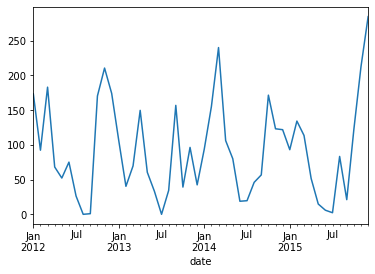

In [15]:
# Visualize the amount of monthly precipitation over time.
df.set_index('date').resample('M').sum().precipitation.plot()

<AxesSubplot:xlabel='date'>

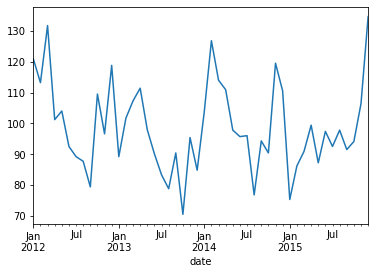

In [16]:
# Visualize the amount of wind over time. Choose a time interval you think is appropriate.
df.set_index('date').resample('M').sum().wind.plot()

In [17]:
# Which year-month combination is the windiest?
print('The year and month with the highest amount of wind is', df.set_index('date').resample('M').sum().wind.idxmax().to_period('M'))

The year and month with the highest amount of wind is 2015-12


In [27]:
# What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
# which day has the highest number of days where weather == sun?
# select all rows where weather == sun
df_sun = df[df.weather == 'sun']
# which year occurs the most
print('The sunniest year is', df_sun.set_index('date').resample('Y').weather.count().idxmax().year)

The sunniest year is 2014


In [19]:
# In which month does it rain the most?
df_rain = df[df.weather == 'rain']
# which month occurs the most
print('The month with the most rain is', df_rain.set_index('date').resample('M').weather.count().idxmax().month_name())

The month with the most rain is November


In [26]:
# Which month has the most number of days with a non-zero amount of precipitation?
print('The month that has the most days with non-zero in precipitation is', df.set_index('date').resample('M').sum().precipitation.idxmin().month_name())


The month that has the most days with non-zero in precipitation is August


data = data.flights_20k()

Convert any negative delays to 0.

Which hour of the day has the highest average delay?

Does the day of the week make a difference in the delay amount?

Does the month make a difference in the delay amount?

In [31]:
flights = data.flights_20k()
flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [33]:
# Convert any negative delays to 0.
flights.delay = flights.delay.apply(lambda x: 0 if x < 0 else x)
flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,0,1489,SEA,MCI
19997,2001-02-07 11:37:00,0,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [44]:
# Which hour of the day has the highest average delay?
flights.set_index('date').resample('H').delay.mean().idxmax().hour
print('The hour with the highest average delay is', flights.set_index('date').resample('H').delay.mean().idxmax().hour,'AM')

The hour with the highest average delay is 3 AM


<AxesSubplot:xlabel='date'>

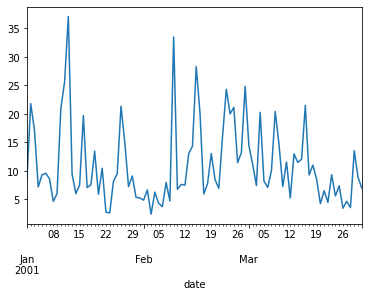

In [46]:
# Does the day of the week make a difference in the delay amount?
flights.set_index('date').resample('D').delay.mean().plot()